# Medical Cost Personal Insurance Project

  
##  Project Description

### Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .


## Step 1: Importing Basic Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Loading Data :  Importing the dataset into our data analysis environment

In [3]:
data = pd.read_csv('/Users/sneha/Downloads/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Step 3: Perfrom EDA on Data

In [4]:
### Display first 5 records : 

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
### print the summary of the DataFrame's structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Check dimensions
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1338
Number of columns: 7


In [7]:
# Data types
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
# count the number of unique values in the given data 
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.1 Check for missing values 

In [9]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:title={'center':'Checking Missing Value with Heatmap'}>

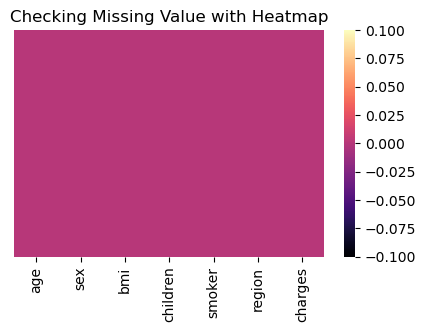

In [10]:
## Visualising the missing values in data using Heatmap. 


plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False)

### We dont have any missing value in the given Data. 

### 3.2 Summary Statistics: Compute summary statistics (e.g., mean, median, standard deviation, min, max) for numerical variables. This helps to understand the central tendencies and distributions of the data. 

In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
50%,39.000000,30.400000,1.000000,9382.033000
max,64.000000,53.130000,5.000000,63770.428010


### 3.3 taking a deeper insights in integer columns of given data. 

In [26]:
int_columns = data.select_dtypes(include='int').columns
int_columns

Index(['age', 'sex', 'children', 'smoker', 'region'], dtype='object')

Value Counts for 'age':
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64



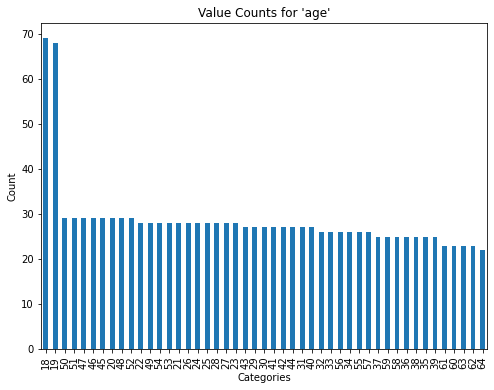

Value Counts for 'sex':
1    676
0    662
Name: sex, dtype: int64



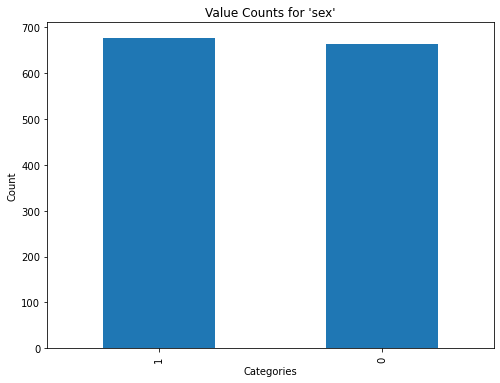

Value Counts for 'children':
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64



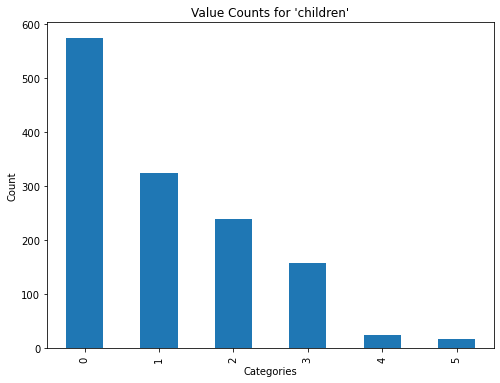

Value Counts for 'smoker':
0    1064
1     274
Name: smoker, dtype: int64



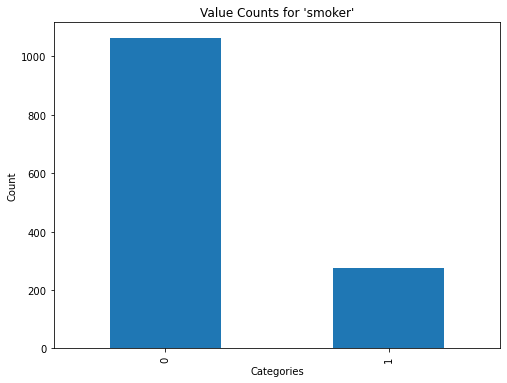

Value Counts for 'region':
2    364
3    325
1    325
0    324
Name: region, dtype: int64



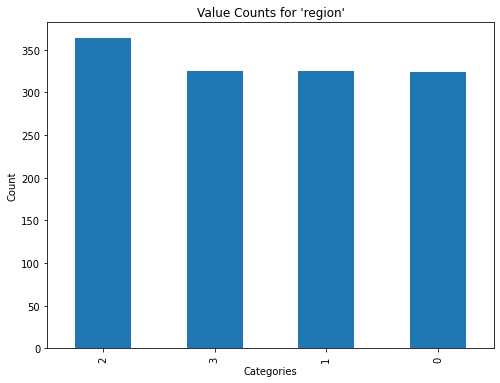

In [27]:
for column in int_columns:
    value_counts = data[column].value_counts()
    print(f"Value Counts for '{column}':\n{value_counts}\n")
    
    plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
    value_counts.plot(kind='bar')
    plt.title(f"Value Counts for '{column}'")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.show()

## Inference :

1. AGE can be a categorical column with only 47 unique values. 

2. AGE of 18 , 19 are maxinum in numbers , while age 64 is least. 

3. Children is also a categorical column with only 5 unique values .

4. People with no kids are highest in number. 

5. Only 18 data with 5 kids. 


### 3.4 Understanding the Object Column. 

In [15]:
object_columns = data.select_dtypes(include='object').columns
object_columns

Index(['sex', 'smoker', 'region'], dtype='object')

Value Counts for 'sex':
male      676
female    662
Name: sex, dtype: int64



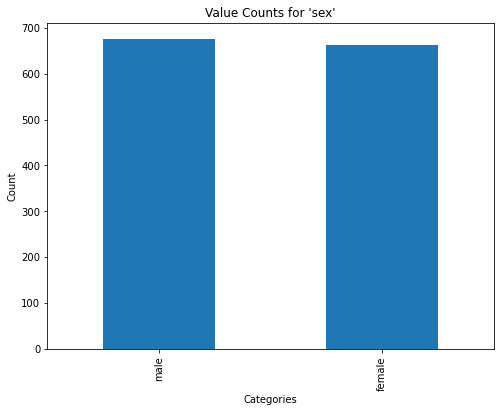

Value Counts for 'smoker':
no     1064
yes     274
Name: smoker, dtype: int64



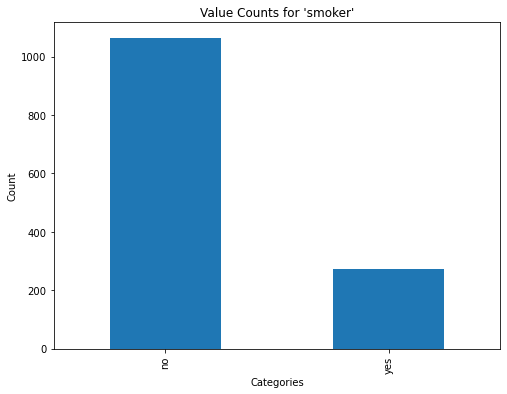

Value Counts for 'region':
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



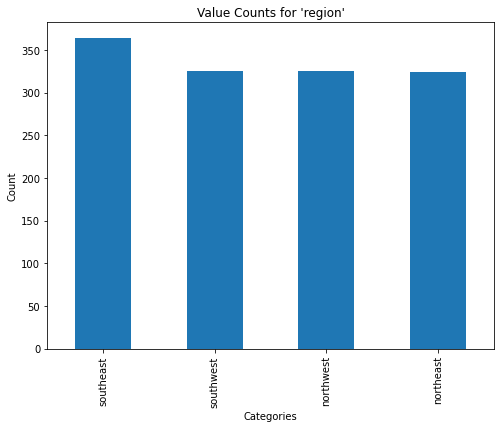

In [19]:
for column in object_columns:
    value_counts = data[column].value_counts()
    print(f"Value Counts for '{column}':\n{value_counts}\n")
    
    plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
    value_counts.plot(kind='bar')
    plt.title(f"Value Counts for '{column}'")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.show()

## Inference : 

1. Sex is propontionaly distributed with 660 approx each category. 

2. There's a huge difference in data with Smoker and Non Smoker Category. 

3. Region is proponationaly distributed with 325 approx each category. 

In [ ]:
## Lets Convert the object variables to Integer by applying LAbel Encoder. 

In [22]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each object column and perform label encoding
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Now, the object columns have been converted to integer type

In [23]:
## Display the data after updates. 

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [24]:
# Checking the data type after converting object to integer Data types
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [25]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## 3.5 Understanding the Float Column

In [ ]:
## There are only 2 float columns in the data : BMI ( Input variable) , and Charges (Output Variable)

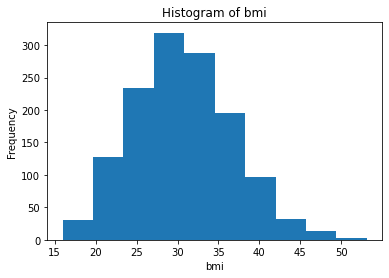

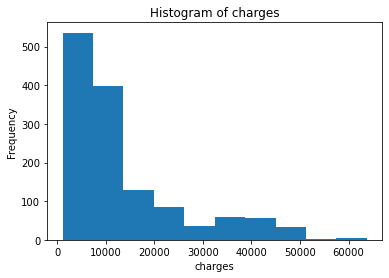

In [28]:
# Create histograms for float columns
float_columns = data.select_dtypes(include='float')    
for column in float_columns.columns:
    plt.figure()
    plt.hist(float_columns[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [70]:
# Filter the data where the output variable is greater than 50,000
filtered_data = data[data['charges'] > 50000]
filtered_data

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [71]:
filtered_data.shape

(7, 7)

In [73]:
## Above 7 data can be removed from our dataset.
# Remove the filtered data from the original DataFrame
data = data[~(data['charges'] > 50000)]

(array([423., 338., 228.,  85.,  66.,  39.,  26.,  53.,  42.,  31.]),
 array([ 1121.8739 ,  5967.45275, 10813.0316 , 15658.61045, 20504.1893 ,
        25349.76815, 30195.347  , 35040.92585, 39886.5047 , 44732.08355,
        49577.6624 ]),
 <BarContainer object of 10 artists>)

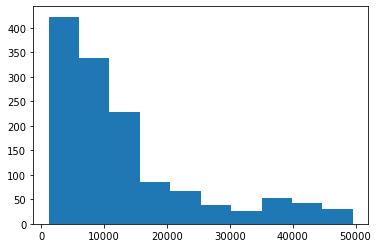

In [75]:
plt.hist(data['charges'], bins=10)

## Plotting Boxplots for the variables to see for outliers. 

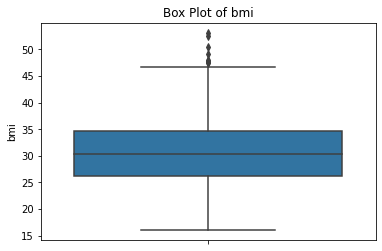

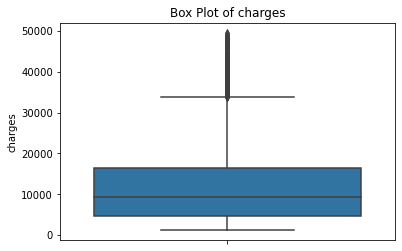

In [76]:
for column in float_columns.columns:
    plt.figure()
    sns.boxplot(data=data, y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

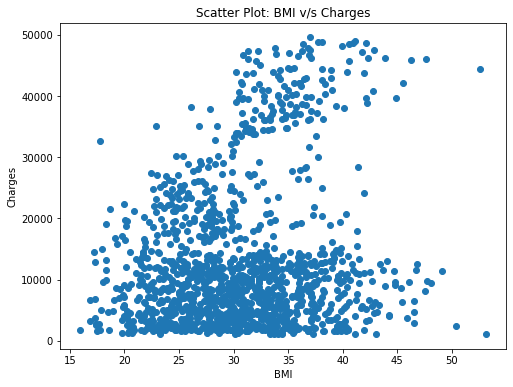

In [155]:
## Plot Scatter plot Bmi vs Charges 

plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot: BMI v/s Charges')
plt.show()

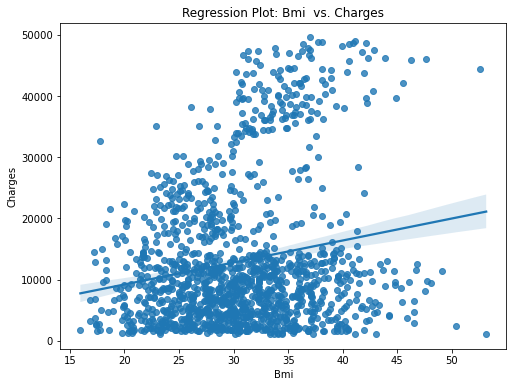

In [156]:
## Visualisng using Regression Plot ( Bmi Vs Charges)

plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='charges', data=data)
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Regression Plot: Bmi  vs. Charges')
plt.show()


## 3.6 Visualise the Input variables vs Output Variables 

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


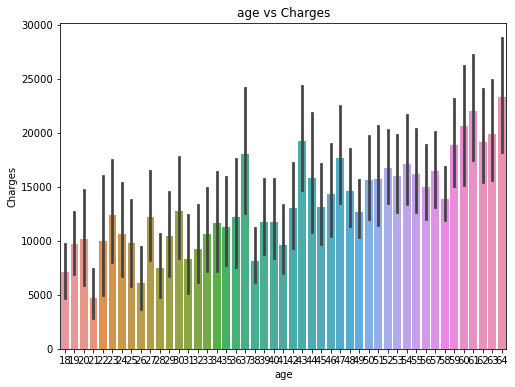

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


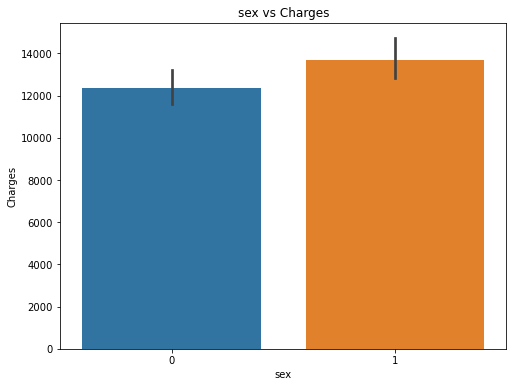

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


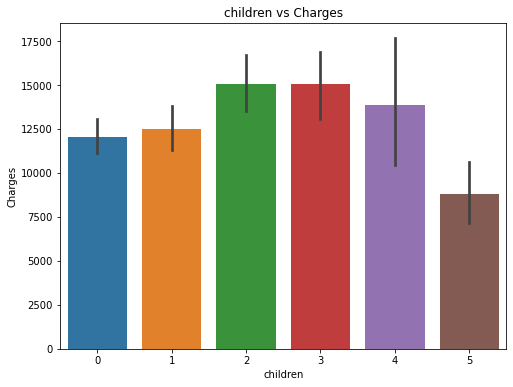

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


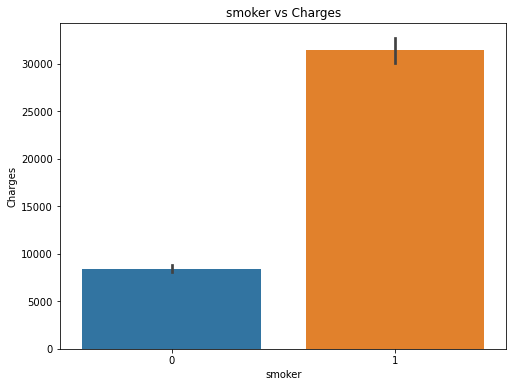

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


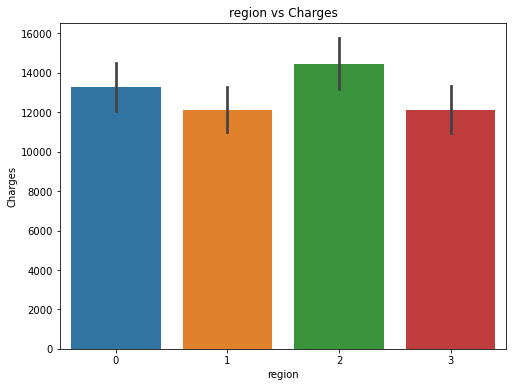

In [158]:
# Separate the target variable (output) and features
X = data.drop('charges', axis=1)  # Features
y = data['charges']  # Target variable

# Get the integer columns
int_columns = X.select_dtypes(include='int64').columns

# Plot bar graphs for each integer column against the output
for column in int_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(X[column], y)
    plt.title(f"{column} vs Charges")
    plt.xlabel(column)
    plt.ylabel("Charges")
    plt.show()


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


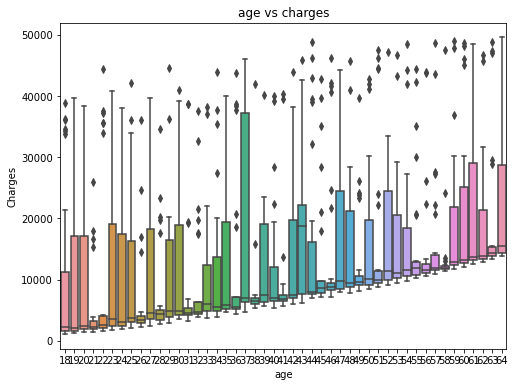

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


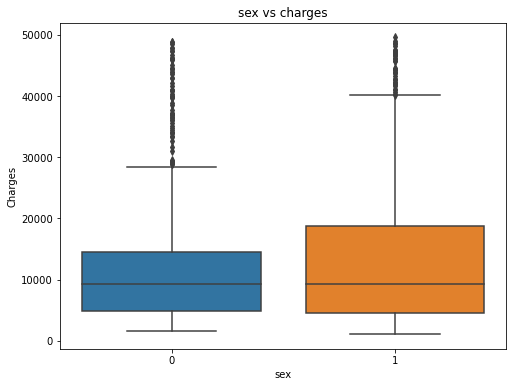

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


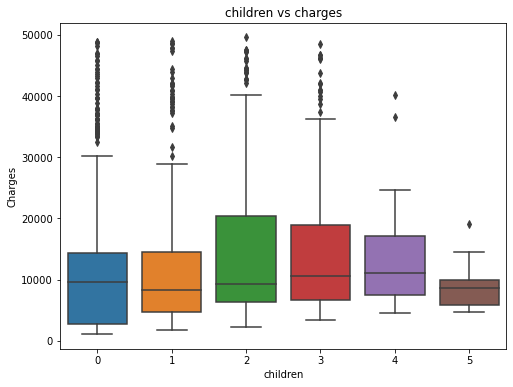

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


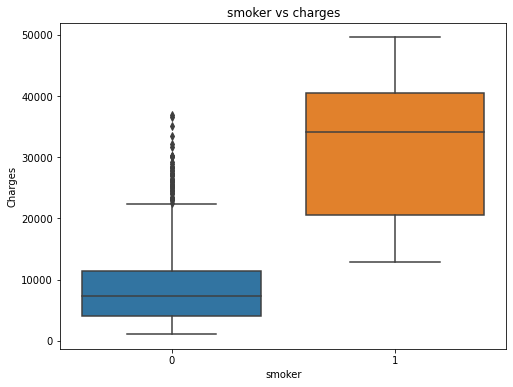

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


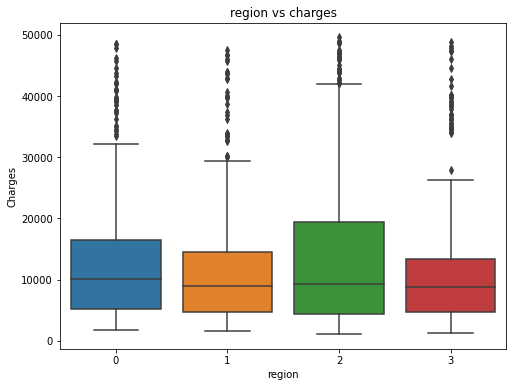

In [159]:
## Box plots for Input Variables Vs charges

for column in int_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(X[column], y)
    plt.title(f"{column} vs charges")
    plt.xlabel(column)
    plt.ylabel("Charges")
    plt.show()


## 3.6 Removing the outliers. 

In [89]:
# Assuming 'data' is a numpy array or pandas DataFrame containing your data

lower_percentile = 1 
upper_percentile = 99 

lower_threshold = np.percentile(data, lower_percentile, axis=0)
upper_threshold = np.percentile(data, upper_percentile, axis=0)

data_no_outliers = data[
    (data >= lower_threshold).all(axis=1) & (data <= upper_threshold).all(axis=1)
]


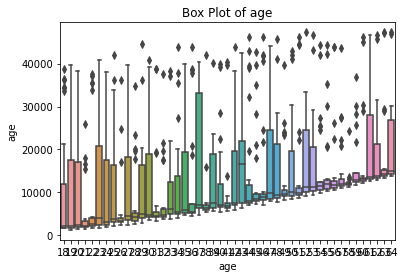

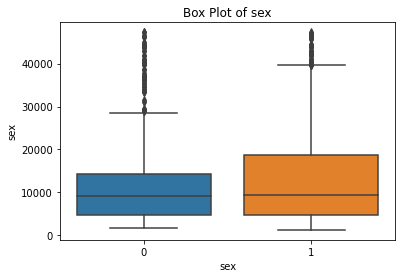

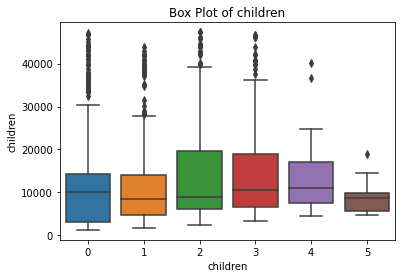

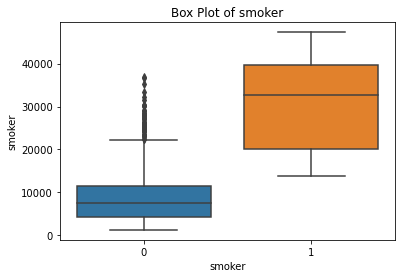

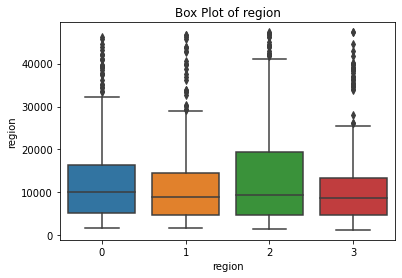

In [90]:
for column in int_columns:
    plt.figure()
    sns.boxplot(data=data_no_outliers,x=column, y='charges')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [91]:


data_no_outliers.describe()

,age,sex,bmi,children,smoker,region,charges
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,39.337774,0.496865,30.498448,1.105016,0.193574,1.506270,12808.895223
std,13.897141,0.500186,5.647317,1.211684,0.395254,1.107886,11116.686962
min,18.000000,0.000000,17.955000,0.000000,0.000000,0.000000,1253.936000
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4829.948737
50%,40.000000,0.000000,30.210000,1.000000,0.000000,2.000000,9369.615750
75%,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,16092.671750
max,64.000000,1.000000,46.090000,5.000000,1.000000,3.000000,47305.305000


In [92]:
## Shape of data after removing huge outliers. 

data_no_outliers.shape

(1276, 7)

In [85]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000,1331.000000
mean,39.185575,0.504884,30.633017,1.09692,0.200601,1.514651,13036.775677
std,14.058021,0.500164,6.088782,1.20603,0.400601,1.105170,11699.360324
min,18.000000,0.000000,15.960000,0.00000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.00000,0.000000,1.000000,4719.630300
50%,39.000000,1.000000,30.305000,1.00000,0.000000,2.000000,9301.893550
75%,51.000000,1.000000,34.600000,2.00000,0.000000,2.000000,16359.170275
max,64.000000,1.000000,53.130000,5.00000,1.000000,3.000000,49577.662400


In [93]:
## Shape of data before removing outliers. 
data.shape

(1331, 7)

## After data cleaning, we can see : 
1. data with bmi  > 46 has been dropped , 
2. data with charges > 47k has been dropped. 

## 3.7 Co relation between features and output. 

In [102]:
data_no_outliers.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.008028,0.080920,0.026490,-0.065601,0.001518,0.267442
sex,-0.008028,1.000000,0.036250,0.027720,0.084399,-0.007041,0.072304
bmi,0.080920,0.036250,1.000000,0.005343,-0.039773,0.145536,0.149799
children,0.026490,0.027720,0.005343,1.000000,0.005013,0.029891,0.072182
smoker,-0.065601,0.084399,-0.039773,0.005013,1.000000,-0.005460,0.774790
region,0.001518,-0.007041,0.145536,0.029891,-0.005460,1.000000,-0.017286
charges,0.267442,0.072304,0.149799,0.072182,0.774790,-0.017286,1.000000


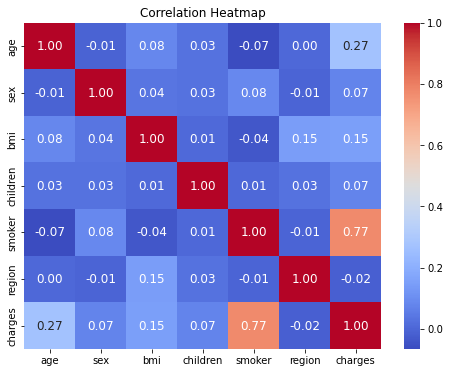

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

## Inference  :
1. Smoker strongly affecting Charges , positive relation.
2. Age and Bmi has loose positive relation to charges. 
3. Smoker not so dependent on any ther variable , yet postive relations with sex , and negative realtion with age.
4. Age shoes positive relation with bmi 
5. Bmi shows positive relations with region.
6. Sex and children have least impact on charges. 

In [ ]:
## lets see the relation of Smoker and Age vs Charges. 

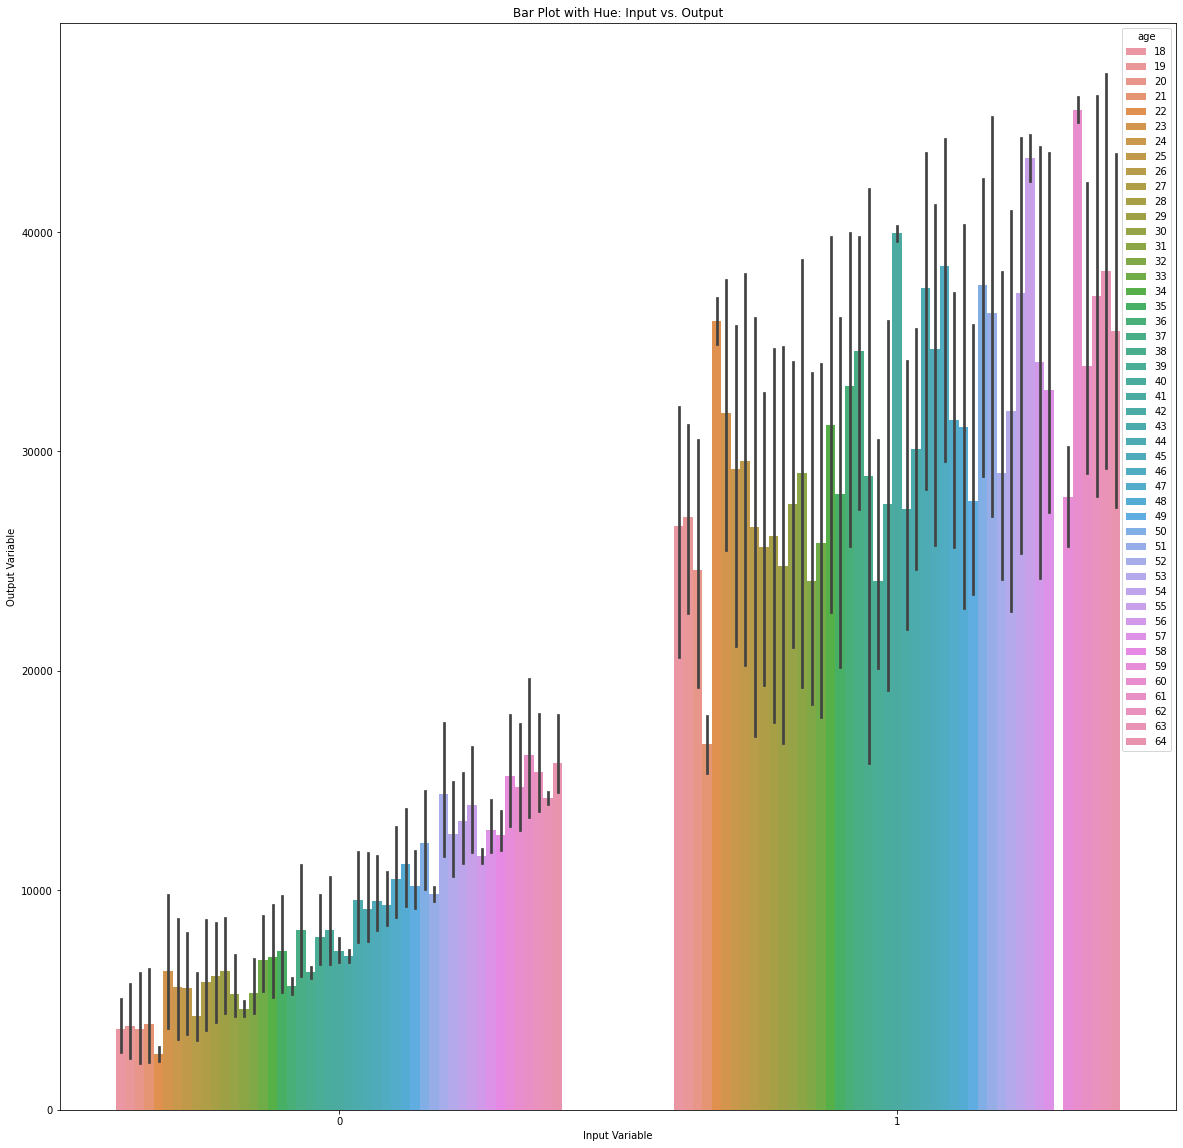

In [131]:
plt.figure(figsize=(20, 20))
sns.barplot(x='smoker', y='charges', hue='age', data=data_no_outliers)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('Bar Plot with age: smoker vs charges')
plt.show()

## Inference : 

1. For a Non smoker , As the age increases - so does the charges 

2. For a Smoker , A pattern can't be inferred. 

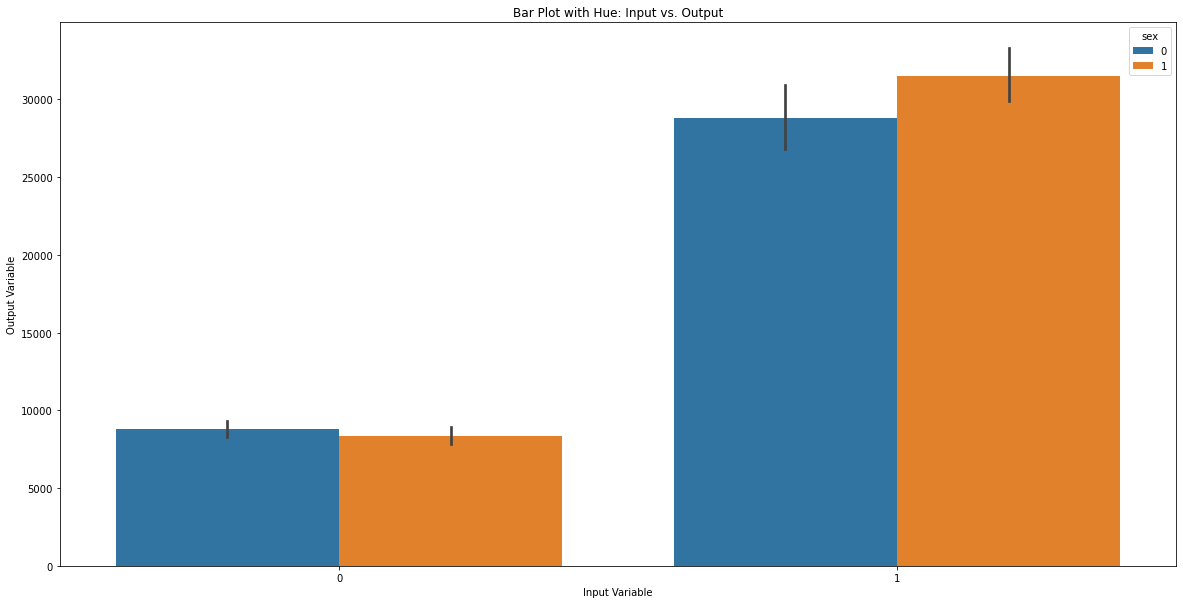

In [130]:
plt.figure(figsize=(20, 10))
sns.barplot(x='smoker', y='charges', hue='sex', data=data_no_outliers)
plt.xlabel('Smoker')
plt.ylabel('charges')
plt.title('Bar Plot with sex: smoker vs charges')
plt.show()

## Inference

Sex has no impact on output.

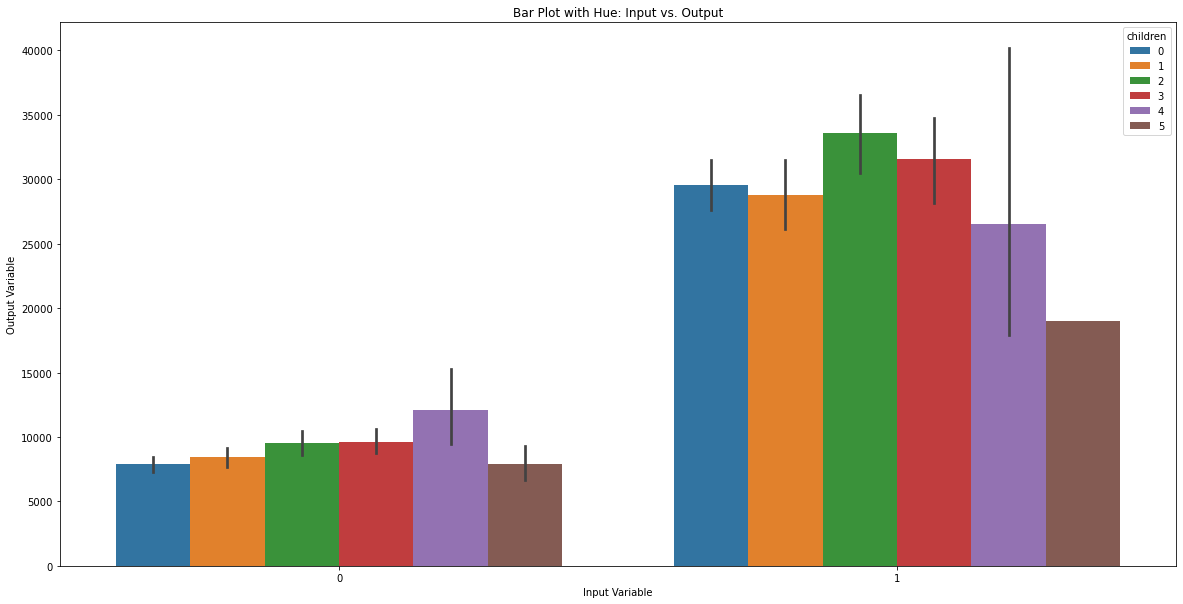

In [129]:
plt.figure(figsize=(20, 10))
sns.barplot(x='smoker', y='charges', hue='children', data=data_no_outliers)
plt.xlabel('Smoker')
plt.ylabel('charges')
plt.title('Bar Plot with children: smoker vs charges')
plt.show()

## Inference 

1. For a Non smoker , for children <=4 there's is an increase in charges.

2. For a Smoker , first there's a gradual increase as the no of child increases , then a dramatic drop as no of children increases.  

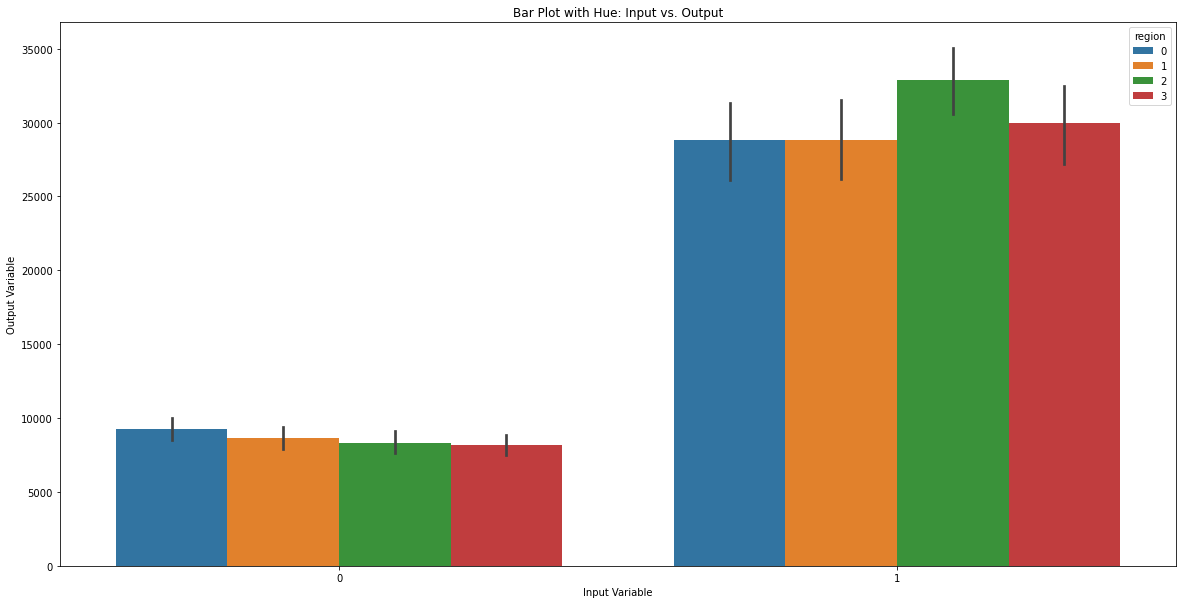

In [128]:
plt.figure(figsize=(20, 10))
sns.barplot(x='smoker', y='charges', hue='region', data=data_no_outliers)
plt.xlabel('Smoker')
plt.ylabel('charges')
plt.title('Bar Plot with region: smoker vs charges')
plt.show()

## INference :
There's so such impact on output. 

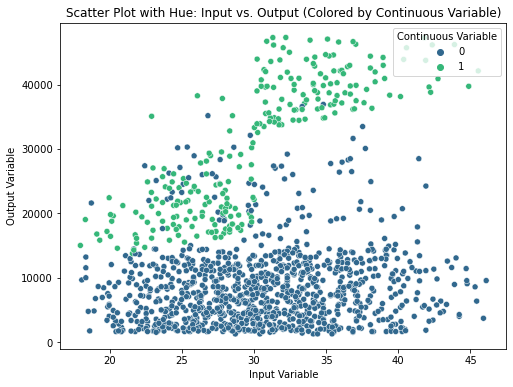

In [127]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data_no_outliers, palette='viridis')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.title('Scatter Plot with smoker: BMI vs. Charges (Colored by Smoker)')
plt.legend(title='Smoker', loc='upper right')
plt.show()

In [116]:
# Calculate skewness for each feature
skewness = data.skew()

# Print the skewness for each feature
print("Skewness for each feature:")
print(skewness)

Skewness for each feature:
age         0.057116
sex        -0.019557
bmi         0.283592
children    0.936365
smoker      1.497000
region     -0.037112
charges     1.452558
dtype: float64


## 4. Feature Importance

Feature Importances:
age: 0.13427095026323013
sex: 0.005744190986174308
bmi: 0.20716064267310044
children: 0.019759812295549847
smoker: 0.6190905122935245
region: 0.013973891488420763


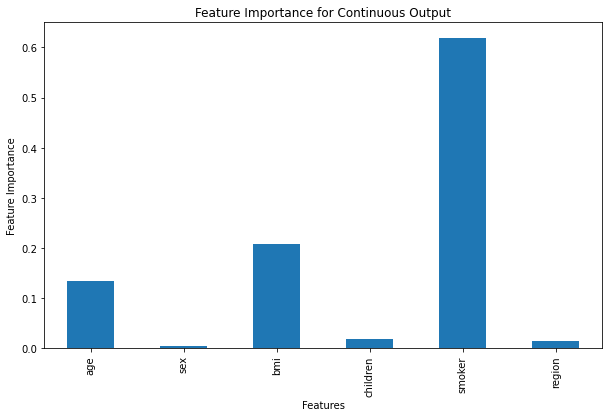

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


# Display feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")
    
# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Continuous Output')
plt.show()


## It is Clear Smoker is the most important feature for the Output variable , while Sex is the least

## 5. Standardising the data 

In [135]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data



,age,sex,bmi,children,smoker,region
0,-1.436416,-1.009815,-0.449030,-0.909871,1.996251,1.344505
1,-1.507576,0.990280,0.515401,-0.080393,-0.500939,0.439328
2,-0.795971,0.990280,0.388891,1.578564,-0.500939,0.439328
3,-0.440169,0.990280,-1.302559,-0.909871,-0.500939,-0.465850
4,-0.511329,0.990280,-0.288017,-0.909871,-0.500939,-0.465850
...,...,...,...,...,...,...
1326,0.769560,0.990280,0.055366,1.578564,-0.500939,-0.465850
1327,-1.507576,-1.009815,0.211449,-0.909871,-0.500939,-1.371028
1328,-1.507576,-1.009815,1.021439,-0.909871,-0.500939,0.439328
1329,-1.294095,-1.009815,-0.794056,-0.909871,-0.500939,1.344505


## 6. Spliting the Data 

In [136]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.2, random_state =1000)

print(X.shape, X_train.shape, X_test.shape)

(1331, 6) (1064, 6) (267, 6)


## 7. Data Modeling 

Create a machine learning model pipeline which contains a list of model from which. we want to compare and find the most appropiate algorithm

In [138]:
### Import the model:


from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LinearRegression())

model_pipeline.append(Ridge(alpha=1.0))

model_pipeline.append(Lasso(alpha=1.0))

model_pipeline.append(SVR(kernel='linear'))

model_pipeline.append(DecisionTreeRegressor())

model_pipeline.append(RandomForestRegressor())


##  Fit model for train dataset 

In [139]:
for model in model_pipeline:
    model.fit(X_train,Y_train)    

In [ ]:
## Fetch and compare the metric values from various models and find the best model. 

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#importing
cross_vals=[]
r_squareds = []
r=[]
mses=[]
rmses=[]
maes=[]
for model in model_pipeline:
    
    y_pred = model.predict(X_test)
    
    y_pred_train = model.predict(X_train)
    
    
    cross_vals.append(cross_val_score(model, X, y, cv=5, scoring='r2').max())
    
    r_squareds.append(r2_score(Y_test,y_pred))
    
    r.append(r2_score(Y_train,y_pred_train))
    
    
    mses.append(mean_squared_error(Y_test,y_pred))
    
    rmses.append(np.sqrt(mean_squared_error(Y_test,y_pred)))
    
    maes.append(mean_absolute_error(Y_test, y_pred))
    

model_list=['Linear_Regression','Ridge','Lasso','SVR','Decision Tree Regressor','Random Forest Regressor']

score_list = pd.DataFrame({'Model':model_list,'Cross_validation_score': cross_vals, 'R_squared':r_squareds,'R_squared(train)':r, 'mse': mses, 'rmse':rmses, 'mae':maes})
score_list

,Model,Cross_validation_score,R_squared,R_squared(train),mse,rmse,mae
0,Linear_Regression,0.779935,0.782820,0.743642,3.277540e+07,5724.979921,4013.241929
1,Ridge,0.779429,0.782713,0.743642,3.279161e+07,5726.395856,4015.378695
2,Lasso,0.779915,0.782801,0.743642,3.277834e+07,5725.237446,4013.413780
3,SVR,-0.077692,-0.022651,0.001194,1.543320e+08,12423.044106,8019.171464
4,Decision Tree Regressor,0.777288,0.719429,0.998156,4.234205e+07,6507.076890,3122.435669
5,Random Forest Regressor,0.867881,0.853759,0.975442,2.206982e+07,4697.852827,2725.308609


1. Cross Validation_Score(Best_Score) : In cross-validation, the maximum score achieved for a good model typically indicates that the model is performing well on the validation data. 

Here, Random Forest Regressor Outranks every other model by Score : 0.86


2. The R-squared (coefficient of determination) value ranges between 0 and 1 and represents the proportion of the variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit of the model to the data, as it implies that a larger proportion of the variability in the target variable can be attributed to the model's predictions.

As, we can Infer Random Forest Regressor gives best R-squared Value with (0.85). 
Random Forest Regressor is the best model here. 

3. RMSE( Root Mean Squared Error) A lower RMSE value indicates that the model's predictions are closer to the actual target values, which is desirable as it indicates a better fit of the model to the data.

As, we can Infer again Random Forest Regressor has the least value. 



# HENCE, RANDOM FOREST REGRESSOR IS THE BEST MODEL 